**Importiere die notwendigen Packages**

In [14]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [15]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/bfs_bev_migrationsstatus_alter_quartier_seit2010_od5307

In [16]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bfs_bev_migrationsstatus_alter_quartier_seit2010_od5307/BEV530OD5307.csv"


# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [17]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [19]:
data2betested.head(200)

,ThemaNr,Thema,AuswertungNr,Auswertung,Zeitbezug,HerkunftNr,Herkunft,...,Alter,QuartierNr,Quartier,KategorieNr,Kategorie,Anteil,Konfidenzintervall
0,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,55,54.4 bis 55.9
1,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,54,53.7 bis 55.2
2,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,55,53.9 bis 55.4
3,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,54,54.0 bis 55.0
4,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,54,52.9 bis 54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,Personen mit Migrationshintergrund,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,42,Langstrasse,nan,NaN,33,30.8 bis 35.6
196,1,Personen mit Migrationshintergrund,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,44,Hard,nan,NaN,47,44.8 bis 49.1
197,1,Personen mit Migrationshintergrund,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,51,Gewerbeschule,nan,NaN,37,34.4 bis 38.9
198,1,Personen mit Migrationshintergrund,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,52,Escher Wyss,nan,NaN,27,24.5 bis 29.6


In [20]:
data2betested.dtypes

ThemaNr                 int64
Thema                  object
AuswertungNr            int64
Auswertung             object
Zeitbezug              object
HerkunftNr              int64
Herkunft               object
Jahr                  float64
AlterNr               float64
Alter                  object
QuartierNr            float64
Quartier               object
KategorieNr           float64
Kategorie              object
Anteil                float64
Konfidenzintervall     object
dtype: object

In [21]:
data2betested.shape

(2352, 16)

Beschreibe einzelne Attribute

In [8]:
data2betested.describe()

,ThemaNr,AuswertungNr,HerkunftNr,Jahr,AlterNr,QuartierNr,KategorieNr,Anteil
count,2352,2352,2352,1400,1120,952,1512,2352
mean,3,2,1,2014,2,65,2,42
std,2,1,1,3,1,36,1,30
min,1,1,0,2010,1,11,1,0
25%,2,2,0,2012,2,33,1,14
50%,3,2,1,2014,2,67,2,38
75%,5,3,2,2017,3,92,3,62
max,6,3,2,2019,4,123,3,100


Wie viele Nullwerte gibt es im Datensatz?

In [9]:
data2betested.isnull().sum()

ThemaNr                  0
Thema                    0
AuswertungNr             0
Auswertung               0
Zeitbezug                0
HerkunftNr               0
Herkunft                 0
Jahr                   952
AlterNr               1232
Alter                    0
QuartierNr            1400
Quartier                 0
KategorieNr            840
Kategorie              840
Anteil                   0
Konfidenzintervall       0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [27]:
data2betested['Jahr']=pd.to_datetime(data2betested['Jahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,ThemaNr,Thema,AuswertungNr,Auswertung,Zeitbezug,HerkunftNr,Herkunft,...,Alter,QuartierNr,Quartier,KategorieNr,Kategorie,Anteil,Konfidenzintervall
0,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,55,54.4 bis 55.9
1,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,54,53.7 bis 55.2
2,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,55,53.9 bis 55.4
3,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,54,54.0 bis 55.0
4,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,54,52.9 bis 54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,6,Anteil der Eingebürgerten an den Schweizerinne...,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,115,Oerlikon,nan,NaN,29,27.6 bis 30.3
2348,6,Anteil der Eingebürgerten an den Schweizerinne...,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,119,Seebach,nan,NaN,38,37.1 bis 39.9
2349,6,Anteil der Eingebürgerten an den Schweizerinne...,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,121,Saatlen,nan,NaN,39,37.3 bis 41.4
2350,6,Anteil der Eingebürgerten an den Schweizerinne...,3,nach Quartier,2015/19,1,Schweizer/-in,...,.,122,Schwamendingen-Mitte,nan,NaN,40,37.9 bis 42.4


Bereite die Daten für die Grafik unten vor

In [28]:
Jahre = data2betested.groupby("Jahr")
len(Jahre)

10

In [29]:
for key, group in Jahre:
    print(key, len(group))

2010-01-01 00:00:00 140
2011-01-01 00:00:00 140
2012-01-01 00:00:00 140
2013-01-01 00:00:00 140
2014-01-01 00:00:00 140
2015-01-01 00:00:00 140
2016-01-01 00:00:00 140
2017-01-01 00:00:00 140
2018-01-01 00:00:00 140
2019-01-01 00:00:00 140


In [32]:
myJahr = "2019-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,ThemaNr,Thema,AuswertungNr,Auswertung,Zeitbezug,HerkunftNr,Herkunft,...,Alter,QuartierNr,Quartier,KategorieNr,Kategorie,Anteil,Konfidenzintervall
0,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,0,Total,...,.,nan,.,nan,NaN,55,54.4 bis 55.9
10,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,1,Schweizer/-in,...,.,nan,.,nan,NaN,37,35.9 bis 37.6
20,1,Personen mit Migrationshintergrund,1,Total,2010 – 2019,2,Ausländer/-in,...,.,nan,.,nan,NaN,94,93.3 bis 94.5
30,1,Personen mit Migrationshintergrund,2,nach Alter,2010 – 2019,0,Total,...,0 bis 19,nan,.,nan,NaN,62,60.1 bis 63.1
31,1,Personen mit Migrationshintergrund,2,nach Alter,2010 – 2019,0,Total,...,20 bis 39,nan,.,nan,NaN,58,57.1 bis 59.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,6,Anteil der Eingebürgerten an den Schweizerinne...,1,Total,2010 – 2019,1,Schweizer/-in,...,.,nan,.,nan,NaN,29,28.4 bis 30.0
2278,6,Anteil der Eingebürgerten an den Schweizerinne...,2,nach Alter,2010 – 2019,1,Schweizer/-in,...,0 bis 19,nan,.,nan,NaN,37,35.1 bis 38.6
2279,6,Anteil der Eingebürgerten an den Schweizerinne...,2,nach Alter,2010 – 2019,1,Schweizer/-in,...,20 bis 39,nan,.,nan,NaN,23,21.2 bis 24.0
2280,6,Anteil der Eingebürgerten an den Schweizerinne...,2,nach Alter,2010 – 2019,1,Schweizer/-in,...,40 bis 59,nan,.,nan,NaN,36,34.1 bis 37.3


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [36]:
test = data2betested.groupby(['Jahr', 'Thema'])[['Anteil']].agg('median')
test
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

Anteil
Jahr       Thema                                                     
2010-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      25
           Geburtsort der Eltern                                   29
           Im Ausland geboren                                      44
           Migrationsstatus, erste und zweite Generation           24
           Mindestens ein Elternteil im Ausland geboren            62
           Personen mit Migrationshintergrund                      52
2011-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      24
           Geburtsort der Eltern                                   28
           Im Ausland geboren                                      44
           Migrationsstatus, erste und zweite Generation           22
           Mindestens ein Elternteil im Ausland geboren            63
           Personen mit Migrationshintergrund                      51
2012-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      27
           Geburtsort der Eltern                                   31
           Im Ausland geboren                                      46
           Migrationsstatus, erste und zweite Generation           26
           Mindestens ein Elternteil im Ausland geboren            64
           Personen mit Migrationshintergrund                      54
2013-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      27
           Geburtsort der Eltern                                   30
           Im Ausland geboren                                      46
           Migrationsstatus, erste und zweite Generation           25
           Mindestens ein Elternteil im Ausland geboren            64
           Personen mit Migrationshintergrund                      55
2014-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      28
           Geburtsort der Eltern                                   31
           Im Ausland geboren                                      47
           Migrationsstatus, erste und zweite Generation           26
           Mindestens ein Elternteil im Ausland geboren            64
           Personen mit Migrationshintergrund                      55
2015-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      28
           Geburtsort der Eltern                                   30
           Im Ausland geboren                                      46
           Migrationsstatus, erste und zweite Generation           25
           Mindestens ein Elternteil im Ausland geboren            66
           Personen mit Migrationshintergrund                      56
2016-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      29
           Geburtsort der Eltern                                   31
           Im Ausland geboren                                      48
           Migrationsstatus, erste und zweite Generation           26
           Mindestens ein Elternteil im Ausland geboren            66
           Personen mit Migrationshintergrund                      56
2017-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      29
           Geburtsort der Eltern                                   31
           Im Ausland geboren                                      47
           Migrationsstatus, erste und zweite Generation           26
           Mindestens ein Elternteil im Ausland geboren            67
           Personen mit Migrationshintergrund                      57
2018-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      29
           Geburtsort der Eltern                                   30
           Im Ausland geboren                                      47
           Migrationsstatus, erste und zweite Generation           26
           Mindestens ein Elternteil im Ausland geboren            66
           Personen mit Migrationshintergrund                      57
2019-01-01 Anteil der Eingebürgerten an den Schweizerinnen...      29
           Geburtsort der Eltern                                   30
   

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [37]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [38]:
mySelection = aktuellesJahr[(aktuellesJahr.KreisSort<2) & (aktuellesJahr.KonOGDSort==1)]
mySelection.head()


AttributeError: 'DataFrame' object has no attribute 'KreisSort'

In [17]:
#mySelection = aktuellesJahr[["StatZoneSort","AnzBestWir"]]
#mySelection

In [18]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['KonOGDKurz'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='StatZoneLang',
    y='AnzBestWir',
    color='KonOGDKurz'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [19]:
alt.Chart(mySelection).mark_circle(size=60).encode(
    x='StatZoneLang',
    y='KonOGDKurz',
    color='AnzBestWir',
    tooltip=['KonOGDKurz','StichtagDatJahr','AnzBestWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

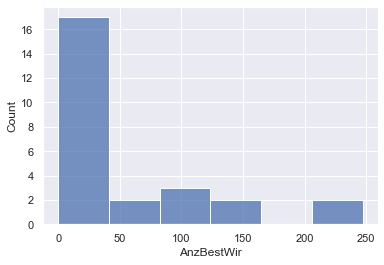

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelection, x="AnzBestWir") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [21]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_statzonen = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statzonen_map.json"
df_statzonen = gpd.read_file(input_statzonen)
df_statzonen.head(2)


,objectid,objid,stznr,stzname,qnr,qname,knr,kname,geometry
0,1,154,7303,Hegibach,73,Hirslanden,7,Kreis 7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ..."
1,2,89,7302,Klus,73,Hirslanden,7,Kreis 7,"POLYGON ((8.57281 47.35806, 8.57274 47.35804, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html